# The Battle of Neighborhoods
### _Opening a new shopping mall in Hyderabad city of Telangana state, India_
#### IBM Data Science Capstone Project, by Vamshi Krishna Gundu, June 2020

***

## Table of Content:
1. Introduction/Business Understanding
2. Analytic approach
3. Data requirements
4. Data Preparation and pre-processing
5. Data Analysis
6. Conclusion

![Namaste Hyderabad](https://camo.githubusercontent.com/6142076fab68a2e69083e1cd00f7419564a0541d/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f313430302f302a2d307a6663716463324e6c6b414f6d66)

## 1. Introduction/Business Understanding
### 1.1 Introduction

    A shopping center, is a group of shops built together, sometimes under one roof(wikipedia). Most of the shopping is done at the shopping malls by us because it is a place where you can buy what you want, have some snack or food in between and if you are tired you can watch a movie or have fun playing games or any activities, all at a single place. So, most of us prefer shopping at shopping malls instead of shopping any other store or outlet. It is a place where any startup or someone can showcase their product and let the market know about it. Now a days, flash mobs are being conducted in Malls, social media festivals are also celebrated by conducting flash mobs and shows. Real estate business, Restaurants, Groceries, Jeweleries, without leaving a corner each and every business is brought into these malls. 

    As a result this is a really huge benifit for the Businesses as well as owners/real-estate, Businesses will get into huge sales and owners of the outlets get the income as rent, as well as real estate developers get the profit as well as fame by constructing large and beautiful shopping malls.

    However there are plenty number of malls which are located in the city of Hyderabad. So, selecting a suitable location for business as well as public is difficult. The location of the mall ultimately decides whether it will get into profits or loss.

### 1.2 Business Problem


    The objective of the project " The Battle of Neighborhoods -  Opening a Shopping Mall in Hyderabad , Telangana, India" is to explore and analyze the neighborhoods and the shopping malls in hyderabad , Telangana and select the best locations in the city to open a new Shopping Mall. Using geocoder library to get the latitude and longitudes for neighborhoods. Foursquare api to explore neighborhoods, Data Science methodology and K means clustering this project will be a solution to the business problem : 
    In the city of Hyderabad , Telangana state of India, if someone is looking to open a Shopping Mall, where would you recommend that they open it so that Business man - investors, property developers and residents in the neighborhoods will get benifitted?
    

### 1.3 Target audience of this Project

    Indian mall developers are looking to add over 65million square feets of new mall supply by 2022 end. Hyderabad one among the top cities comprise 11% share out of 7 cities. Hyderabad malls have average vacancy of 15%, lease rates of 100/- tp 160/- rupees per square feet, At present, Hyderabad has over four million sft of the area, says an article by Times of India. Hyderabad expected to get 6 million sq ft of shopping mall space in 3 years, says Economic Times report. With the increasing supply of shopping malls selecting a location which will meet the customer demand is difficult. So, this project helps in finding a good location to open a new shopping mall to Business stake holders, property developers, investors  as well as customers .

___
## 2. Analytic Approach

    First we are going to analyze the data using exploratory data analysis to uncover the hidden patterns in data and to provide useful insights to both the constructor, Business man and residents live in neighborhoods.
    And secondly we will use prescriptive analysis to help decide a location to construct new shopping mall using K-means clustering.

## 3. Data Requirements

### 3.1 Below is the required data:
    We are going to analyze Hyderabad city shopping malls in this city.
- List of neighborhoods in the city of Hyderabad. This will give us the scope of the areas to open shopping malls near to the residential areas and meet the demand.
- Latitude and Longitudes of the extracted neighborhood data. This will act as the input parameters to the foursquare api to explore a neighborhood.
- Shopping malls data, this will be the output from the foursquare api and help us to create clusters on the neighborhoods depending on the frequency of malls in a given radius of a particular neighborhood.

### 3.2 Sources and methods to get the data:
- The list of neighborhoods in Hyderabad is taken from a wikipedia page (https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Hyderabad), contains 31 neighborhoods in total, combining all the zones. By using web scraping technique we will get the neighborhood data from the wikipedia page.
- We will then get the Latitude and Longitude of each neighborhood using geocoder library and attach these coordinates to our neighborhood data
- Then with the help of Foursquare api calls we will send the coordinates of each neighborhoods and get the venues details of shopping malls and create the shopping malls data of each neighborhood.(https://developer.foursquare.com/docs/api)

- This project will be completed with the help of data science skills, data cleaning, exploring, analyzing, visualizing using folium maps in particular. Also takes help from foursquare api to get the shopping mall details which are near to each neighborhood. And finally using a machine learning technique 'K-means clustering' to cluster malls into different categories.

## 4. Data Preparation and Pre-processing

### 4.1 Importing required libraries

In [4]:
!pip install geocoder
!pip install geopy
!pip install beautifulsoup4
!pip install geopandas
!pip install folium

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: 

In [5]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge geocoder --yes # uncomment this line if you haven't completed the Foursquare API lab
import geocoder # to get coordinates

import requests # library to handle requests

#!conda install -c anaconda beautifulsoup4 --yes
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


### 4.2 Data preparation :Scraping Neighborhood data from Wikipedia page

    Lets scrape the Neighborhood data from wikipedia page using beautifulsoup library and get all the list elements and store in a list called hyd_neighborhood_list

In [6]:
page = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Hyderabad"
request = requests.get(page).text
soup = BeautifulSoup(request,'html.parser')

hyd_neighborhood_list = []
[hyd_neighborhood_list.append(row.text) for row in soup.find_all("div",class_="toc")[0].findAll("li")]
print(hyd_neighborhood_list)

['1 Central\n\n1.1 Ameerpet\n1.2 Sanathnagar\n1.3 Khairatabad\n1.4 Musheerabad\n1.5 Amberpet\n1.6 Nampally\n1.7 Secunderabad\n1.8 Secunderabad Cantonment\n\n', '1.1 Ameerpet', '1.2 Sanathnagar', '1.3 Khairatabad', '1.4 Musheerabad', '1.5 Amberpet', '1.6 Nampally', '1.7 Secunderabad', '1.8 Secunderabad Cantonment', '2 Old City', '3 Western\n\n3.1 HITEC City\n3.2 Jubilee Hills\n3.3 Gachibowli\n\n', '3.1 HITEC City', '3.2 Jubilee Hills', '3.3 Gachibowli', '4 North Western\n\n4.1 Serilingampally\n4.2 Kukatpally\n4.3 Patancheru\n\n', '4.1 Serilingampally', '4.2 Kukatpally', '4.3 Patancheru', '5 Northern\n\n5.1 Balanagar\n5.2 Qutbullapur\n5.3 Kompally\n5.4 Alwal\n\n', '5.1 Balanagar', '5.2 Qutbullapur', '5.3 Kompally', '5.4 Alwal', '6 North Eastern\n\n6.1 Malkajgiri\n6.2 Kapra\n6.3 Keesara\n\n', '6.1 Malkajgiri', '6.2 Kapra', '6.3 Keesara', '7 Eastern\n\n7.1 Uppal Kalan\n7.2 Ghatkesar\n\n', '7.1 Uppal Kalan', '7.2 Ghatkesar', '8 South Eastern\n\n8.1 Dilsukhnagar\n8.2 LB Nagar\n8.3 Saroornaga

    Using regular expression we will find all the list element that start with float values and store them in a list called float_elements

In [7]:
import re
float_elements = []
[float_elements.extend(re.findall("\d+[.]\d*.*", hyd_neighborhood_list[num])) for num in range(len(hyd_neighborhood_list))]
print(float_elements)

['1.1 Ameerpet', '1.2 Sanathnagar', '1.3 Khairatabad', '1.4 Musheerabad', '1.5 Amberpet', '1.6 Nampally', '1.7 Secunderabad', '1.8 Secunderabad Cantonment', '1.1 Ameerpet', '1.2 Sanathnagar', '1.3 Khairatabad', '1.4 Musheerabad', '1.5 Amberpet', '1.6 Nampally', '1.7 Secunderabad', '1.8 Secunderabad Cantonment', '3.1 HITEC City', '3.2 Jubilee Hills', '3.3 Gachibowli', '3.1 HITEC City', '3.2 Jubilee Hills', '3.3 Gachibowli', '4.1 Serilingampally', '4.2 Kukatpally', '4.3 Patancheru', '4.1 Serilingampally', '4.2 Kukatpally', '4.3 Patancheru', '5.1 Balanagar', '5.2 Qutbullapur', '5.3 Kompally', '5.4 Alwal', '5.1 Balanagar', '5.2 Qutbullapur', '5.3 Kompally', '5.4 Alwal', '6.1 Malkajgiri', '6.2 Kapra', '6.3 Keesara', '6.1 Malkajgiri', '6.2 Kapra', '6.3 Keesara', '7.1 Uppal Kalan', '7.2 Ghatkesar', '7.1 Uppal Kalan', '7.2 Ghatkesar', '8.1 Dilsukhnagar', '8.2 LB Nagar', '8.3 Saroornagar', '8.4 Hayathnagar', '8.1 Dilsukhnagar', '8.2 LB Nagar', '8.3 Saroornagar', '8.4 Hayathnagar', '9.1 Mehdipat

    From list object called float_elements we are going to get the unique neighborhoods and store with the help of set called hyd_neighborhood_set and print the length of the set of neighborhoods we scraped from wikipedia page.

In [8]:
hyd_neighborhood_set = set([])
[hyd_neighborhood_set.add(" ".join(re.findall("[a-zA-Z]+", float_elements[num]))) for num in  range(len(float_elements))]

print("Number of neighborhoods we have scraped: ",len(hyd_neighborhood_set))
print(hyd_neighborhood_set)

Number of neighborhoods we have scraped:  30
{'Sanathnagar', 'Keesara', 'Jubilee Hills', 'Patancheru', 'Serilingampally', 'Hayathnagar', 'Secunderabad', 'Ghatkesar', 'Alwal', 'Qutbullapur', 'Balanagar', 'Kukatpally', 'Saroornagar', 'Kompally', 'Nampally', 'Musheerabad', 'HITEC City', 'Dilsukhnagar', 'Khairatabad', 'Rajendranagar', 'Mehdipatnam', 'Shamshabad', 'Uppal Kalan', 'Ameerpet', 'Gachibowli', 'Malkajgiri', 'Amberpet', 'LB Nagar', 'Kapra', 'Secunderabad Cantonment'}


    We then finally convert our set of neighborhoods to list and store in a column called Neighborhood of hyd_df dataframe and print head of it and also see the shape of dataframe

In [9]:
hyd_df = pd.DataFrame({"Neighborhood": list(hyd_neighborhood_set)})
print(hyd_df.head())
print(hyd_df.shape)

      Neighborhood
0      Sanathnagar
1          Keesara
2    Jubilee Hills
3       Patancheru
4  Serilingampally
(30, 1)


In [10]:
hyd_df

,Neighborhood
0,Sanathnagar
1,Keesara
2,Jubilee Hills
3,Patancheru
4,Serilingampally
5,Hayathnagar
6,Secunderabad
7,Ghatkesar
8,Alwal
9,Qutbullapur


### 4.3 Getting the geographical coordinates using geocoder library

    We define a function called get_latlang to get the latitude and longitudes for a given neighborhood and loop over all the neighborhoods in our hyd_df dataframe to get respective coordinates, if any of the neighborhoods has no location information lets return and store as None

In [11]:
def get_latlang(neighborhood):
    locator = Nominatim(user_agent="myGeocoder")
    location = locator.geocode(neighborhood+", Hyderabad,Telangana")
    if(location==None):
        return None
    else:
        return location.latitude,location.longitude

    Sending one neighborhood at a time and storing the returned coordinates in a list called coordinates

In [12]:
coordinates = [ get_latlang(neighborhood) for neighborhood in hyd_df["Neighborhood"] ]

    Lets temporarily store our coordinates in latitude and longitude columns of hyd_coords dataframe

In [13]:
hyd_coords = pd.DataFrame(coordinates, columns=['Latitude', 'Longitude'])
hyd_coords

,Latitude,Longitude
0,17.456965,78.443478
1,17.524931,78.666534
2,17.430836,78.410288
3,17.528609,78.267425
4,17.465657,78.340672
5,17.328115,78.604540
6,17.433725,78.500683
7,17.451084,78.684302
8,17.502229,78.508858
9,17.499327,78.453214


    Lets add the coordinates to our dataframe hyd_df with Latitude and Longitude as column names from the temporarily created dataframe hyd_coords

In [14]:
hyd_df['Latitude'] = hyd_coords['Latitude']
hyd_df['Longitude'] = hyd_coords['Longitude']
hyd_df.head()

,Neighborhood,Latitude,Longitude
0,Sanathnagar,17.456965,78.443478
1,Keesara,17.524931,78.666534
2,Jubilee Hills,17.430836,78.410288
3,Patancheru,17.528609,78.267425
4,Serilingampally,17.465657,78.340672


    We can see some of the Latitude and Longitude values in rows of some Neighborhoods(Ghatkesar,Secunderabad Cantt,Keesara,Patancheru,Qutbullapur) which are in the out skirts of the city of Hyderabad as None, lets remove them from our dataframe hyd_df using dropna and reset index

In [15]:
hyd_df = hyd_df.dropna(axis = 0).reset_index(drop=True)
hyd_df

,Neighborhood,Latitude,Longitude
0,Sanathnagar,17.456965,78.443478
1,Keesara,17.524931,78.666534
2,Jubilee Hills,17.430836,78.410288
3,Patancheru,17.528609,78.267425
4,Serilingampally,17.465657,78.340672
5,Hayathnagar,17.328115,78.604540
6,Secunderabad,17.433725,78.500683
7,Ghatkesar,17.451084,78.684302
8,Alwal,17.502229,78.508858
9,Qutbullapur,17.499327,78.453214


     Above is the final dataframe with neighborhood and location data as latitude and longitude on which we are going to work on now, before moving forward lets save the data in a csv file named hyd_df.csv

In [16]:
hyd_df.to_csv("hyd_df.csv", index=False)

### 4.4 Create the map of Hyderabad city with neighborhoods superimposed on top

    Lets get the coordinates of Hyderabad, Telangana and store its value in hyd_location to create a map of hyderabad showing its neighborhoods using folium library

In [17]:
address = 'Hyderabad, Telangana'
geolocator = Nominatim(user_agent="myGeocoder")
hyd_location = geolocator.geocode(address)
print('The geograpical coordinates of Hyderabad,Telangana are, Latitude: ', hyd_location.latitude,' Longitude: ', hyd_location.longitude)

The geograpical coordinates of Hyderabad,Telangana are, Latitude:  17.360589  Longitude:  78.4740613


In [18]:
map_hyd = folium.Map(location=[hyd_location.latitude, hyd_location.longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(hyd_df['Latitude'], hyd_df['Longitude'], hyd_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_hyd)  

    
map_hyd

    The red color circle represents the Outer Ring Road of the city and blue dots represents the main neighborhoods of the city.

***

## 5. Data Analysis:

### 5.1 Exploring the Neighborhoods using Foursquare API

    Here I save Foursquare credentials with client_id and client_sececrt as dummy, so that no body can use them other than me;)

In [19]:
CLIENT_ID = '**********************************************' # your Foursquare ID
CLIENT_SECRET = '****************************************' # your Foursquare Secret
VERSION = '20210715'

    Now, let's get the top 100 venues that are within a radius of 2000 meters for each neighborhood using below code.
    Below code first creates a url with 2000m as radius and venues limit to 100 for each neighborhood and then gets the results json using requests.get method, for each venue we get we will only take values like name, latitude,longitude and category.

In [20]:
radius = 2000
LIMIT = 100
venues = []
for lat, long, neighborhood in zip(hyd_df['Latitude'], hyd_df['Longitude'], hyd_df['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'],  
            venue['venue']['categories'][0]['name'],
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng']))

In [21]:
# convert the venues list into a new DataFrame
hyd_venues_df = pd.DataFrame(venues)

# define the column names
hyd_venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'Venue_name', 'Venue_category','Venue_latitude', 'Venue_longitude']

print(hyd_venues_df.shape)
hyd_venues_df.head()

(953, 7)


,Neighborhood,Latitude,Longitude,Venue_name,Venue_category,Venue_latitude,Venue_longitude
0,Sanathnagar,17.456965,78.443478,Sri Ramulu Theatre,Indie Movie Theater,17.467776,78.428811
1,Sanathnagar,17.456965,78.443478,Domino's Pizza,Pizza Place,17.441819,78.446165
2,Sanathnagar,17.456965,78.443478,Gokul theatre,Indie Movie Theater,17.453579,78.434393
3,Sanathnagar,17.456965,78.443478,Sanath Nagar Bus Station,Bus Station,17.454899,78.447747
4,Sanathnagar,17.456965,78.443478,Hotel Udipi Home,Breakfast Spot,17.442330,78.443250


In [22]:
hyd_venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,Venue_name,Venue_category,Venue_latitude,Venue_longitude
Neighborhood,,,,,,
Alwal,5,5,5,5,5,5
Amberpet,17,17,17,17,17,17
Ameerpet,100,100,100,100,100,100
Balanagar,7,7,7,7,7,7
Dilsukhnagar,13,13,13,13,13,13
Gachibowli,70,70,70,70,70,70
Ghatkesar,5,5,5,5,5,5
HITEC City,100,100,100,100,100,100
Hayathnagar,1,1,1,1,1,1


In [23]:
print('There are {} uniques categories combining all the neighborhoods of the city'
      .format(len(hyd_venues_df['Venue_category'].unique())))

There are 128 uniques categories combining all the neighborhoods of the city


    Lets see the list of venue categories that are present in the city neighborhoods

In [24]:
hyd_venues_df['Venue_category'].unique()

array(['Indie Movie Theater', 'Pizza Place', 'Bus Station',
       'Breakfast Spot', 'Indian Restaurant', 'Bakery',
       'Fruit & Vegetable Store', 'Sandwich Place', 'Train Station',
       'Restaurant', 'Asian Restaurant', 'Snack Place', 'Mountain',
       'Bistro', 'Ice Cream Shop', 'Cupcake Shop', 'Café',
       'North Indian Restaurant', 'Juice Bar', 'Lounge', 'Gaming Cafe',
       'Coffee Shop', 'Gym', 'Chinese Restaurant', 'Deli / Bodega',
       'Frozen Yogurt Shop', 'Hookah Bar', 'Spa', 'Bowling Alley',
       'Cocktail Bar', 'BBQ Joint', 'Bar', 'South Indian Restaurant',
       'Nightclub', 'Food Truck', 'Dessert Shop', 'Brewery',
       'Parsi Restaurant', 'Sports Bar', 'Dance Studio', 'Liquor Store',
       'Italian Restaurant', 'Gastropub', 'Social Club',
       'Middle Eastern Restaurant', 'Park',
       'Multicuisine Indian Restaurant', 'Mediterranean Restaurant',
       'Irish Pub', 'Comfort Food Restaurant', 'Beer Garden',
       'Food Court', 'Hotel', 'Diner', 'New A

    Lets check for mall categories if present any as the main aim of this project is on shopping mall category

In [25]:
'Shopping Mall' in hyd_venues_df['Venue_category'].unique()

True

It is true that Shopping Mall category is present in the fetched venues list

### 5.2 Analyze venues in each Neighborhood

    Lets analyze each neighborhood venues by making venue category as column using get_dummies method and add city Neighborhood column at the front of the dataframe and renaming it to Neighborhoods to avoid confusion with the category 'Neighborhood'

In [26]:
# one hot encoding
val = hyd_venues_df['Neighborhood'] 

hyd_data_onehot = pd.get_dummies(hyd_venues_df[['Venue_category']], prefix="", prefix_sep="")

# dropping the existing Neighborhood column
hyd_data_onehot.drop(['Neighborhood'], inplace=True,axis=1)

# add neighborhood column back to dataframe in the front column
hyd_data_onehot.insert(loc=0, column='Neighborhoods', value=val)

print(hyd_data_onehot.shape)
hyd_data_onehot.head()

(953, 128)


,Neighborhoods,ATM,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Business Service,Butcher,Café,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,Golf Course,Grocery Store,Gym,Harbor / Marina,Historic Site,Hookah Bar,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Laser Tag,Light Rail Station,Liquor Store,Lounge,Mattress Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,New American Restaurant,Nightclub,North Indian Restaurant,Office,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Pub,Rajasthani Restaurant,Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Social Club,South Indian Restaurant,Spa,Sports Bar,Stadium,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant
0,Sanathnagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Sanathnagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Sanathnagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Sanathnagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sanathnagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


    Lets group the neighborhoods and calculate the mean of each category and reset the index

In [27]:
hyd_grouped = hyd_data_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(hyd_grouped.shape)
hyd_grouped

(29, 128)


,Neighborhoods,ATM,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Business Service,Butcher,Café,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,Golf Course,Grocery Store,Gym,Harbor / Marina,Historic Site,Hookah Bar,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Laser Tag,Light Rail Station,Liquor Store,Lounge,Mattress Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,New American Restaurant,Nightclub,North Indian Restaurant,Office,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Pub,Rajasthani Restaurant,Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Social Club,South Indian Restaurant,Spa,Sports Bar,Stadium,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant
0,Alwal,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.200000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.200000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.200000,0.000000
1,Amberpet,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.117647,0.000000,0.000000,0.000000,0.00,0.117647,0.00,0.000000,0.117647,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.058824,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.117647,0.117647,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.058824,0.058824,0.00,0.000000,0.000000,0.058824,0.00,0.000000,0.000000,0.058824,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.058824,0.000000
2,Ameerpet,0.00,0.00,0.000000,0.01,0.000000,0.00,0.010000,0.000000,0.010000,0.030000,0.010000,0.000000,0.00,0.01,0.00,0.030000,0.01,0.000000,0.020000,0.000000,0.000000,0.000000,0.00,0.000000,0.040000

    Lets now only grab Shopping Malls categories from all the neighborhoods

In [28]:
hyd_mall = hyd_grouped[["Neighborhoods","Shopping Mall"]]
hyd_mall

,Neighborhoods,Shopping Mall
0,Alwal,0.000000
1,Amberpet,0.058824
2,Ameerpet,0.010000
3,Balanagar,0.142857
4,Dilsukhnagar,0.000000
5,Gachibowli,0.014286
6,Ghatkesar,0.000000
7,HITEC City,0.030000
8,Hayathnagar,0.000000
9,Jubilee Hills,0.000000


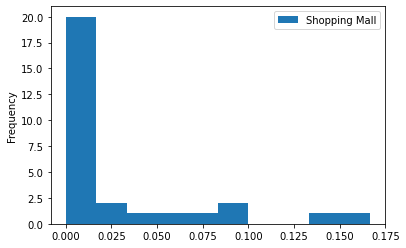

In [29]:
count, bin_edges = np.histogram(hyd_mall['Shopping Mall'])
hyd_mall.plot(kind='hist')

    If you can see most of the neighborhoods, almost half of them are lacking Shopping Malls and remaining neighborhoods are having malls moderately.  

### 5.3 Cluster the Neighborhoods by Venue Categories using K-means clustering

    In this corner we are going to form clusters on Neighborhoods based on the Venues it has nearby using K-means clustering

    Lets find the k value for K-means to form clusters using below function with the help of elbow method

In [30]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X1)
    return km.inertia_

    Lets pass the venue categories as X value to the model

In [31]:
X1 = hyd_grouped.drop(["Neighborhoods"], 1)

Text(0, 0.5, 'Error')

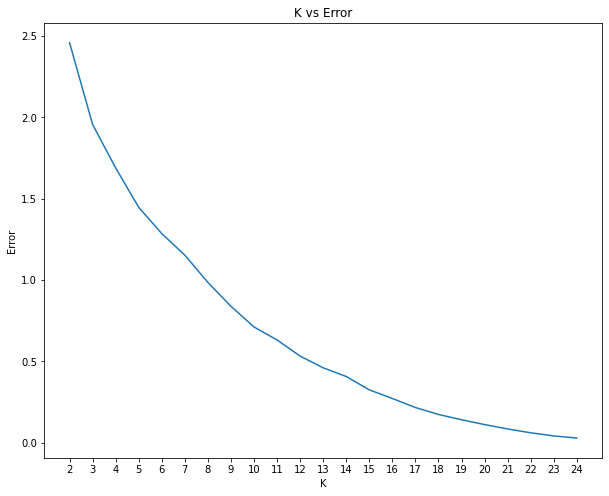

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

scores = [get_inertia(x) for x in range(2, 25)]
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 25), y=scores)
plt.title("K vs Error")
plt.xticks(range(2, 25))
plt.xlabel("K")
plt.ylabel("Error")

    From above curve we can assume that k-value of 15 is the optimal one

In [33]:
n_clusters1 = 15
hyd_venues_clustering = hyd_grouped.drop(["Neighborhoods"], 1)
kmeans1 = KMeans(n_clusters=n_clusters1, init='k-means++', max_iter=15, random_state=8).fit(X1)
kmeans1.labels_[0:10]

array([ 6,  1,  1, 10,  1,  1,  0,  1,  2,  1], dtype=int32)

    Lets add cluster labels to a new copied data frame

In [34]:
hyd_venues_merged = hyd_grouped.copy()
hyd_venues_merged["Cluster_labels"] = kmeans1.labels_

    Add back our Neighborhood column to dataframe

In [35]:
hyd_venues_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
hyd_venues_merged.head()

,Neighborhood,ATM,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Business Service,Butcher,Café,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,Golf Course,Grocery Store,Gym,Harbor / Marina,Historic Site,Hookah Bar,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Laser Tag,Light Rail Station,Liquor Store,Lounge,Mattress Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,New American Restaurant,Nightclub,North Indian Restaurant,Office,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Pub,Rajasthani Restaurant,Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Social Club,South Indian Restaurant,Spa,Sports Bar,Stadium,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Cluster_labels
0,Alwal,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.200000,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.000000,0.20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.00,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00,0.20,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.2,0.0,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.200000,0.00,6
1,Amberpet,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.117647,0.0,0.00,0.00,0.00,0.117647,0.0,0.00,0.117647,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.00,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.058824,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.117647,0.117647,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.058824,0.058824,0.00,0.00,0.000000,0.058824,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.058824,0.00,1
2,Ameerpet,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.01,0.030000,0.01,0.0,0.0,0.01,0.0,0.03,0.01,0.000000,0.02,0.0,0.0,0.0,0.0,0.0,0.040000,0.0,0.04,0.04,0.01,0.040000,0.0,0.01,0.010000,0.0,0.0,0.0,0.0,0.02,0.02,0.0,0.02,0.0,0.0,0.0,0.01,0.0,0.000000,0.030000,0.0,0.01,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.000000,0.0,0.0,0.01,0.0,0.0,0.020000,0.05,0.0,0.01,0.030000,0.170000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.000000,0.0,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.000000,0.040000,0.01,0.01,0.010000,0.050000,0.0,0.0,0.0,0.010000,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.000000,0.05,1
3,Balanagar,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.142857,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.00,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00,0.

    Add coordinates, Latitude and Longitude to the above dataframe

In [36]:
hyd_venues_merged = hyd_venues_merged.join(hyd_df.set_index("Neighborhood"), on="Neighborhood")
print(hyd_venues_merged.shape)
hyd_venues_merged.head() # check the last columns!

(29, 131)


,Neighborhood,ATM,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Business Service,Butcher,Café,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,Golf Course,Grocery Store,Gym,Harbor / Marina,Historic Site,Hookah Bar,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Laser Tag,Light Rail Station,Liquor Store,Lounge,Mattress Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,New American Restaurant,Nightclub,North Indian Restaurant,Office,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Pub,Rajasthani Restaurant,Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Social Club,South Indian Restaurant,Spa,Sports Bar,Stadium,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Cluster_labels,Latitude,Longitude
0,Alwal,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.200000,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.000000,0.20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.00,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.00,0.20,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.2,0.0,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.200000,0.00,6,17.502229,78.508858
1,Amberpet,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.117647,0.0,0.00,0.00,0.00,0.117647,0.0,0.00,0.117647,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.00,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.058824,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.117647,0.117647,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.058824,0.058824,0.00,0.00,0.000000,0.058824,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.058824,0.00,1,17.390263,78.516481
2,Ameerpet,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.01,0.030000,0.01,0.0,0.0,0.01,0.0,0.03,0.01,0.000000,0.02,0.0,0.0,0.0,0.0,0.0,0.040000,0.0,0.04,0.04,0.01,0.040000,0.0,0.01,0.010000,0.0,0.0,0.0,0.0,0.02,0.02,0.0,0.02,0.0,0.0,0.0,0.01,0.0,0.000000,0.030000,0.0,0.01,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.000000,0.0,0.0,0.01,0.0,0.0,0.020000,0.05,0.0,0.01,0.030000,0.170000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.000000,0.0,0.020000,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.000000,0.040000,0.01,0.01,0.010000,0.050000,0.0,0.0,0.0,0.010000,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.000000,0.05,1,17.437501,78.448251
3,Balanagar,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.142857,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.000000,0.00,0.0,0.0,0.0,0.0,0.0

    Sort above dataframe by cluster labels

In [37]:
hyd_venues_merged.sort_values(["Cluster_labels"], inplace=True)
hyd_venues_merged

,Neighborhood,ATM,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Station,Business Service,Butcher,Café,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,Golf Course,Grocery Store,Gym,Harbor / Marina,Historic Site,Hookah Bar,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lake,Laser Tag,Light Rail Station,Liquor Store,Lounge,Mattress Store,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mountain,Movie Theater,Multicuisine Indian Restaurant,Multiplex,New American Restaurant,Nightclub,North Indian Restaurant,Office,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Pub,Rajasthani Restaurant,Restaurant,Sandwich Place,Scenic Lookout,Science Museum,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Social Club,South Indian Restaurant,Spa,Sports Bar,Stadium,Steakhouse,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Cluster_labels,Latitude,Longitude
6,Ghatkesar,0.20,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.2,0.00,0.000000,0.00,0.000000,0.000000,0.200000,0.0,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.200000,0.000000,0,17.451084,78.684302
14,Kukatpally,0.00,0.00,0.038462,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.057692,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.019231,0.000000,0.00,0.019231,0.019231,0.000000,0.000000,0.000000,0.00,0.019231,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.019231,0.000000,0.019231,0.000000,0.00,0.019231,0.000000,0.000000,0.134615,0.000000,0.019231,0.000000,0.00,0.019231,0.000000,0.019231,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.019231,0.000000,0.00,0.000000,0.000000,0.019231,0.000000,0.057692,0.134615,0.000000,0.019231,0.00,0.000000,0.000000,0.019231,0.019231,0.019231,0.00,0.000000,0.00,0.000000,0.0,0.00,0.019231,0.00,0.019231,0.000000,0.000000,0.0,0.000000,0.00,0.038462,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.076923,0.00,0.019231,0.000000,0.019231,0.00,0.000000,0.000000,0.038462,0.000000,0.019231,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.019231,0.000000,0.00,0.00,0.000000,0.000000,1,17.493084,78.405441
17,Mehdipatnam,0.00,0.00,0.000000,0.00,0.000000,0.00,0.066667,0.000000,0.022222,0.000000,0.000000,0.000000,0.00,0.0

    Create a map of hyderabad and add neighborhoods and cluster them based on venues it has

In [38]:
venue_map_clusters = folium.Map(location=[hyd_location.latitude, hyd_location.longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(n_clusters1)
ys = [i+x+(i*x)**2 for i in range(n_clusters1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hyd_venues_merged['Latitude'], hyd_venues_merged['Longitude'], hyd_venues_merged['Neighborhood'], hyd_venues_merged['Cluster_labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(venue_map_clusters)
venue_map_clusters

### 5.4 Cluster the Neighborhoods by Shopping Malls using K-means clustering

    Lets cluster the above Shopping malls dataframe using K-means clustering, first we will have to find the number of clusters to be formed such that it should be an optimal one, for that we are going to use elbow curve lineplot with x-axis as k and y-axis as error

In [39]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X2)
    return km.inertia_

    We are gonna use above function to get the error score for each k value

In [40]:
X2 = hyd_mall.drop(["Neighborhoods"], 1)

    We are going to pass X2 value as hyd_mall['Shopping Mall']

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:3: ConvergenceWarning: Number of distinct clusters (13) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:3: ConvergenceWarning: Number of distinct clusters (13) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:3: ConvergenceWarning: Number of distinct clusters (13) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:3: ConvergenceWarning: Number of distinct clusters (13) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  app.launch_new_instance()
/opt/conda/envs/Python-3.7-O

Text(0, 0.5, 'Error')

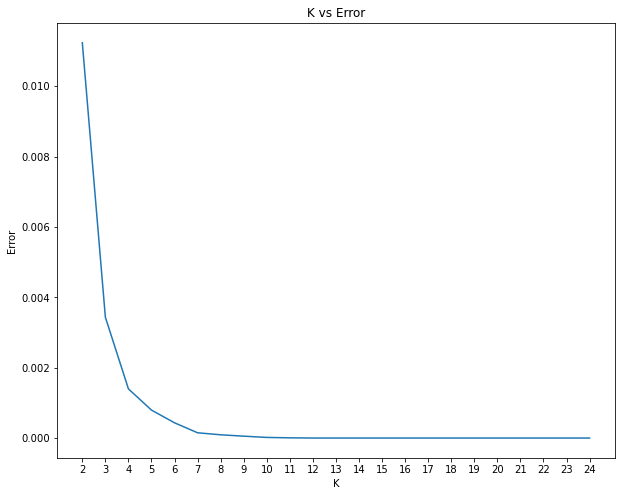

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

scores = [get_inertia(x) for x in range(2, 25)]
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 25), y=scores)
plt.title("K vs Error")
plt.xticks(range(2, 25))
plt.xlabel("K")
plt.ylabel("Error")

    From the above elbow graph we can use k value for k-means as 5 as the optimal k

In [42]:
n_clusters2 = 5
hyd_mall_clustering = hyd_mall.drop(["Neighborhoods"], 1)
kmeans2 = KMeans(n_clusters=n_clusters2, init='k-means++', max_iter=15, random_state=8).fit(X2)
kmeans2.labels_[0:10]

array([3, 4, 0, 2, 3, 0, 3, 0, 3, 3], dtype=int32)

In [43]:
hyd_mall_merged = hyd_mall.copy()
hyd_mall_merged["Cluster_labels"] = kmeans2.labels_

In [44]:
hyd_mall_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
hyd_mall_merged.head()

,Neighborhood,Shopping Mall,Cluster_labels
0,Alwal,0.000000,3
1,Amberpet,0.058824,4
2,Ameerpet,0.010000,0
3,Balanagar,0.142857,2
4,Dilsukhnagar,0.000000,3


In [47]:
hyd_mall_merged = hyd_mall_merged.join(hyd_df.set_index("Neighborhood"), on="Neighborhood")
print(hyd_mall_merged.shape)
hyd_mall_merged.head() # check the last columns!

(29, 5)


,Neighborhood,Shopping Mall,Cluster_labels,Latitude,Longitude
19,Nampally,0.014085,0,17.391852,78.466005
2,Ameerpet,0.010000,0,17.437501,78.448251
5,Gachibowli,0.014286,0,17.443622,78.351964
7,HITEC City,0.030000,0,17.449005,78.383138
12,Khairatabad,0.020000,0,17.411771,78.462200


In [48]:
hyd_mall_merged.sort_values(["Cluster_labels"], inplace=True)
hyd_mall_merged

,Neighborhood,Shopping Mall,Cluster_labels,Latitude,Longitude
19,Nampally,0.014085,0,17.391852,78.466005
2,Ameerpet,0.010000,0,17.437501,78.448251
5,Gachibowli,0.014286,0,17.443622,78.351964
7,HITEC City,0.030000,0,17.449005,78.383138
12,Khairatabad,0.020000,0,17.411771,78.462200
24,Saroornagar,0.080000,1,17.361165,78.538756
15,LB Nagar,0.090909,1,17.350162,78.551094
10,Kapra,0.083333,1,17.484636,78.561009
21,Qutbullapur,0.166667,2,17.499327,78.453214
3,Balanagar,0.142857,2,17.476746,78.422108


In [49]:
map_mall_clusters = folium.Map(location=[hyd_location.latitude, hyd_location.longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(n_clusters2)
ys = [i+x+(i*x)**2 for i in range(n_clusters2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(hyd_mall_merged['Latitude'], hyd_mall_merged['Longitude'], hyd_mall_merged['Neighborhood'], hyd_mall_merged['Cluster_labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mall_clusters)
map_mall_clusters

    There are 5 clusters out of which we will examine each cluster in the next session, lets save this map as html

In [50]:
map_mall_clusters.save('map_mall_clusters.html')

### 5.5 Examining each Neighborhoods' Shopping Mall cluster

In [51]:
hyd_mall_merged.loc[hyd_mall_merged['Cluster_labels'] == 0]

,Neighborhood,Shopping Mall,Cluster_labels,Latitude,Longitude
19,Nampally,0.014085,0,17.391852,78.466005
2,Ameerpet,0.010000,0,17.437501,78.448251
5,Gachibowli,0.014286,0,17.443622,78.351964
7,HITEC City,0.030000,0,17.449005,78.383138
12,Khairatabad,0.020000,0,17.411771,78.462200


    This is the cluster 0 with only 1 Neighborhood with mean value more than all the clusters as it is an industrial area with small shopping malls around it

In [52]:
hyd_mall_merged.loc[hyd_mall_merged['Cluster_labels'] == 1]

,Neighborhood,Shopping Mall,Cluster_labels,Latitude,Longitude
24,Saroornagar,0.080000,1,17.361165,78.538756
15,LB Nagar,0.090909,1,17.350162,78.551094
10,Kapra,0.083333,1,17.484636,78.561009


    This is the cluster-1 with almost no shopping malls, some of the areas might be having one or two shopping malls but our model did not detect it because of the radius(2000m) that we have chosed.

In [53]:
hyd_mall_merged.loc[hyd_mall_merged['Cluster_labels'] == 2]

,Neighborhood,Shopping Mall,Cluster_labels,Latitude,Longitude
21,Qutbullapur,0.166667,2,17.499327,78.453214
3,Balanagar,0.142857,2,17.476746,78.422108


In [54]:
hyd_mall_merged.loc[hyd_mall_merged['Cluster_labels'] == 3]

,Neighborhood,Shopping Mall,Cluster_labels,Latitude,Longitude
17,Mehdipatnam,0.0,3,17.394263,78.434251
4,Dilsukhnagar,0.0,3,17.368795,78.525030
6,Ghatkesar,0.0,3,17.451084,78.684302
8,Hayathnagar,0.0,3,17.328115,78.604540
9,Jubilee Hills,0.0,3,17.430836,78.410288
11,Keesara,0.0,3,17.524931,78.666534
13,Kompally,0.0,3,17.510838,78.480227
27,Serilingampally,0.0,3,17.465657,78.340672
26,Secunderabad Cantonment,0.0,3,17.433725,78.500683
28,Shamshabad,0.0,3,17.262704,78.388111


In [55]:
hyd_mall_merged.loc[hyd_mall_merged['Cluster_labels'] == 4]

,Neighborhood,Shopping Mall,Cluster_labels,Latitude,Longitude
1,Amberpet,0.058824,4,17.390263,78.516481
14,Kukatpally,0.038462,4,17.493084,78.405441


    These clusters 2,3 and 4 has enough number of shopping malls in these neighborhoods with different frequencies of mean.
    Neighborhoods in clusters 2 and 3 comes under main city or popular areas of the city Hyderabad.

## 6. Conclusion

- Most of the shopping malls are situated in the main areas of Hyderabad city, with the highest number in cluster 2,3 and  moderate number of malls in cluster 0 and 4. On the other hand, cluster 1 has very low number to completely no shopping malls in the neighborhoods. This represents a great opportunity and high potential areas to open new shopping malls as there is very little to no competition from existing malls and are popular areas of the city with IT hubs.
    
- Meanwhile, shopping malls in cluster 2 are likely suffering from intense competition due to oversupply and high concentration of shopping malls, this also shows that the oversupply of shopping malls mostly happened in the central area to main area of the city, with the outskirts area still have very few shopping malls. Therefore, this project recommends property developers to invest on these findings to open new shopping malls in neighborhoods in cluster 1 with little to no competition.
    
- Property developers with unique selling propositions to stand out from the competition can also open new shopping malls in neighborhoods in cluster 4 with moderate competition.
    
- Finally, property developers are advised to avoid neighborhoods in cluster 2,3 which already have high concentration of shopping malls and suffering from intense competition.